In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tqdm.notebook as tqdm
from matplotlib import pyplot as plt

In [32]:
passenger_details_10 = pd.read_parquet('output_d10k_50repl/passenger_parquet')
passenger_details_12 = pd.read_parquet('output_d12k_50repl/passenger_parquet')
passenger_details_15 = pd.read_parquet('output_d15k_50repl/passenger_parquet')
passenger_details_18 = pd.read_parquet('output_d18k_50repl/passenger_parquet')

In [34]:
def graph_wait_times(passenger_details, ax_mean, ax_median, unique_title = ''):
    mean_wait_time = passenger_details.groupby('replication').waiting_time.mean()
    median_wait_time = passenger_details.groupby('replication').waiting_time.median()
    
    sns.histplot(data = mean_wait_time, ax = ax_mean)
    ax_mean.set_title('Mean Wait Time Distribution' + unique_title)
    sns.histplot(data = median_wait_time, ax = ax_median)
    ax_median.set_title('Median Wait Time Distribution' + unique_title)

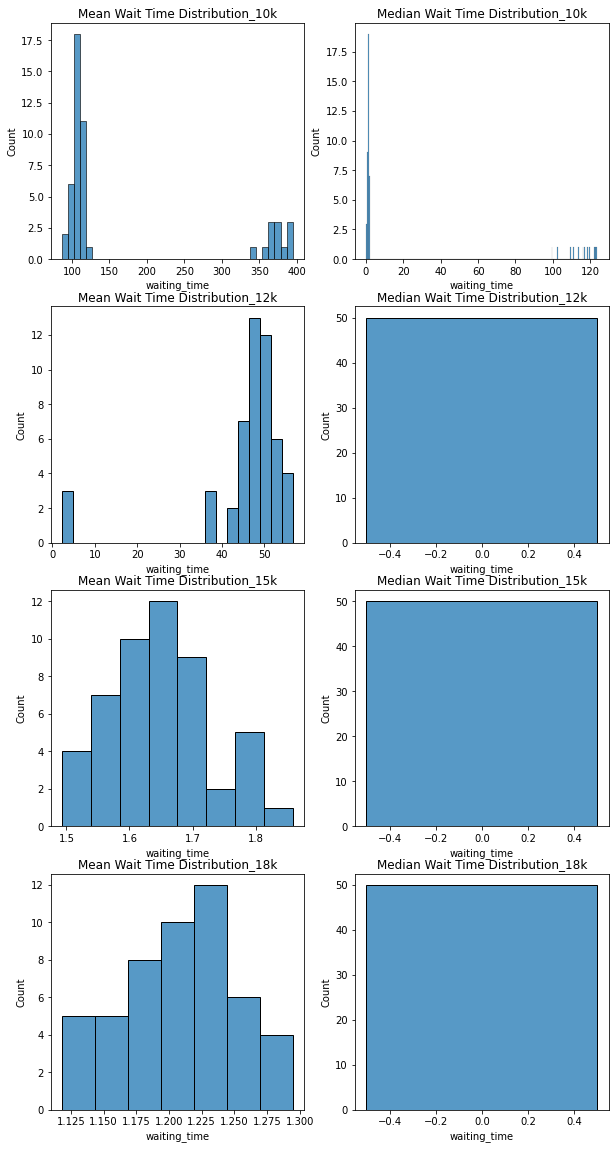

In [39]:
#get a look at the average wait time distribution
f, ax = plt.subplots(4,2, figsize=(10,20))

graph_wait_times(passenger_details_10, ax[0][0], ax[0][1], '_10k')
graph_wait_times(passenger_details_12, ax[1][0], ax[1][1], '_12k')
graph_wait_times(passenger_details_15, ax[2][0], ax[2][1], '_15k')
graph_wait_times(passenger_details_18, ax[3][0], ax[3][1], '_18k')

In [40]:
def graph_wait_time_hourly(passenger_details, ax, unique_title):
    hourly_wait_times = passenger_details.groupby(['replication','arrival_hour']).waiting_time.mean().reset_index()
    
    sns.lineplot(data = hourly_wait_times, x = 'arrival_hour', y = 'waiting_time', hue = 'replication', ax = ax)
    ax.set_title('Hourly Mean Wait Time' + unique_title)

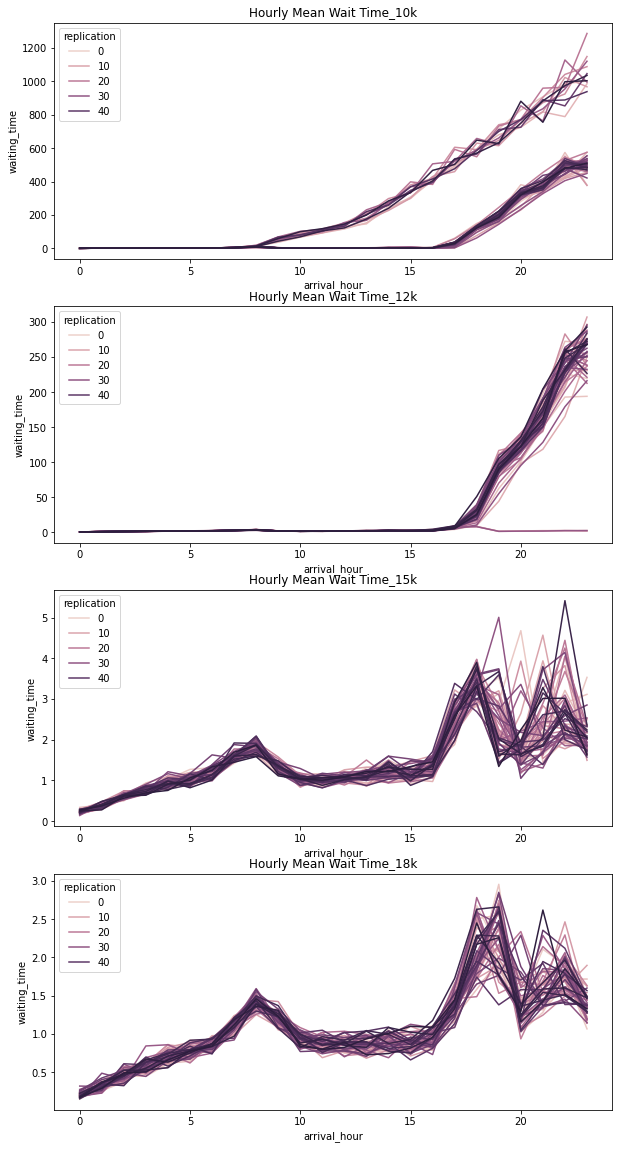

In [42]:
f, ax = plt.subplots(4,1, figsize=(10,20))

graph_wait_time_hourly(passenger_details_10, ax[0], '_10k')
graph_wait_time_hourly(passenger_details_12, ax[1], '_12k')
graph_wait_time_hourly(passenger_details_15, ax[2], '_15k')
graph_wait_time_hourly(passenger_details_18, ax[3], '_18k')